# DATA COLLECTION PORTION OF THE NOTEBOOK

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Sklearn Libraries
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data directly from the website
df_UCI = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

df_UCI.columns = ['A1','A2','A3','A4','A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df_UCI

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
# Describing the Data
df_UCI.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
# Looking at the datas info
df_UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


# DATA PREPROCESSING PORTION OF THE NOTEBOOK
This is where I identify examples with missing features remove those rows. Categorical labels have been mapped to integers and the data is brought down to a similiar scale using Standard Scalar.

The Result of this section is that the in-memory dataframe contains standardized, mapped, and feature-complete information for every feature contained in each example.

##### Dealing with the Missing Values

In [ ]:
# Converting the ? into NaN values
df_UCI.replace({'?': np.nan}, inplace=True)

# Identifying missing values in tabluar form
df_UCI.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

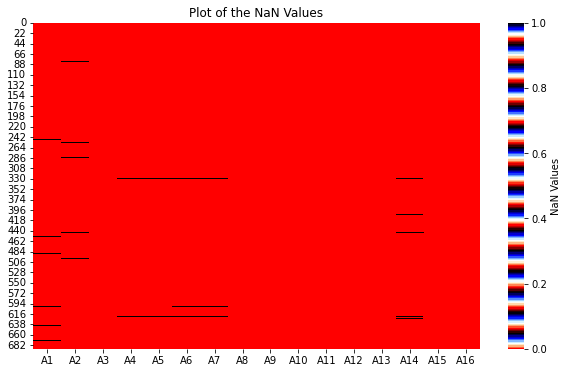

In [ ]:
# Plotting the NaN values
plt.figure(figsize=(10,6))
sns.heatmap(df_UCI.isna(), cmap='flag', cbar_kws={'label':'NaN Values'})
plt.title("Plot of the NaN Values")
plt.show()

In [ ]:
# Removing the rows that have NaN Values
df_UCI.dropna(axis=0, inplace=True)

# Displaying that all the rows have been removed
df_UCI.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [ ]:
# Changing A14 into a integer with out leading zeros
df_UCI['A14'] = df_UCI['A14'] .astype(int)

# Creating a Pipeline
scale_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

# Columns that need to be one hot encoded or mapped
cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

# Scalling the Numeric Features of the dataset
scaler = StandardScaler()
df_UCI[scale_cols] = scaler.fit_transform(df_UCI[scale_cols])

In [ ]:
# Displaying that the columns have been scaled
df_UCI.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,-0.056962,-0.961440,u,g,w,v,-0.295171,t,t,-0.302596,f,g,0.128682,-0.193125,+
1,a,2.296536,-0.073565,u,g,q,h,0.236217,t,t,0.704516,f,g,-0.816802,-0.086443,+
2,a,-0.592078,-0.861903,u,g,q,h,-0.220955,t,f,-0.504019,f,g,0.592504,-0.036150,+
3,b,-0.310572,-0.654865,u,g,w,v,0.446990,t,t,0.503093,t,g,-0.477855,-0.192553,+
4,b,-0.958122,0.158358,u,g,w,v,-0.158613,t,f,-0.504019,f,s,-0.358926,-0.193125,+


In [ ]:
# Getting dummies for the categorical columns
df_UCI = pd.get_dummies(data=df_UCI, columns=cols, drop_first=True)
df_UCI

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,-0.881193,1.046233,-0.295171,-0.504019,0.473575,-0.193125,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,-0.746780,-0.812134,-0.072523,-0.101174,0.116789,-0.118066,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
687,-0.528676,1.726075,-0.072523,-0.302596,0.116789,-0.192934,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,-1.148329,-0.920630,-0.654378,-0.504019,0.592504,-0.050247,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_UCI.shape

(653, 38)

### Markdown Summary for Part 2

In the assignment it was noted that the data set had NaN values represented as 
?. Therefore to get all of the NaN/Null functions to work it is necessary to convert these question makes into NaNs. To better display the NaN values they are then placed into a heatmap and summed up. Because the NaN values are not taking up a significant amount of the data I decided to remove the values.

After removing the null values I scale the numeric features and one hotencode the categorical features. During the one hot encoding I am removing the first value. 

This leaves me with the data set in a form that is ready to be used for the next portion o fthe lab.

# FEATURE SELECTION PORTION OF THE NOTEBOOK

I will assess feature imporantce using a RandomForest Classifier and the SelectFromModel class, similar to the 'Assessing feature importance with Random Forests' section of the ch04 notebook. Your goal in this section will be to reduce the dimensionality of the UCI Credit Approval Data set to the five most relevant features. You will then compare the accuracy of a KNN classifier trained from the entire dataset to one trained only on  the feature subset you identified

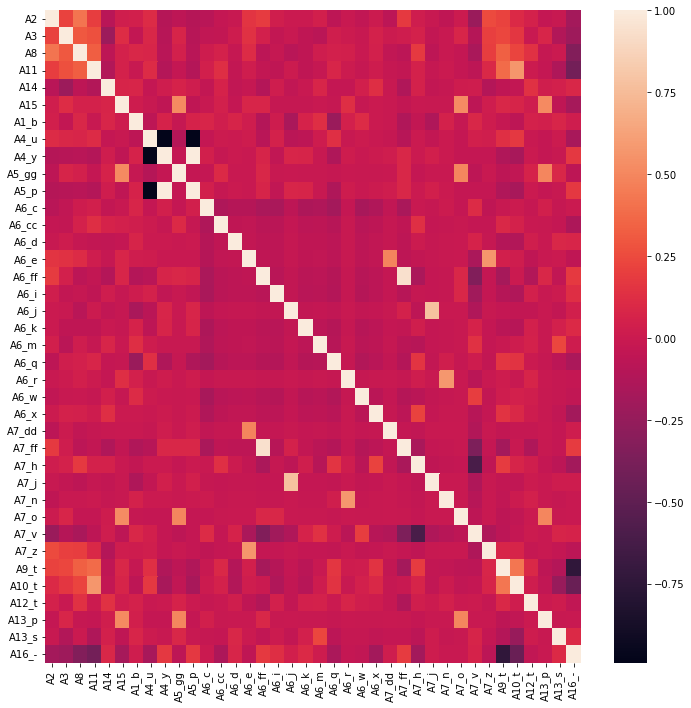

In [ ]:
# Displaying the correlation of variables
plt.figure(figsize=(12,12))
sns.heatmap(df_UCI.corr())
plt.show()

In [ ]:
df_UCI

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,-0.881193,1.046233,-0.295171,-0.504019,0.473575,-0.193125,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,-0.746780,-0.812134,-0.072523,-0.101174,0.116789,-0.118066,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
687,-0.528676,1.726075,-0.072523,-0.302596,0.116789,-0.192934,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,-1.148329,-0.920630,-0.654378,-0.504019,0.592504,-0.050247,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Reordering the columns to get a1_b into the first value. That way it can be used to represent the Y value
org_cols = df_UCI.columns.tolist()
org_cols.remove('A1_b')
org_cols.insert(0, 'A1_b')
df_UCI = df_UCI.reindex(columns=org_cols)
df_UCI

,A1_b,A2,A3,A8,A11,A14,A15,A4_u,A4_y,A5_gg,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,1,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,1,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,-0.881193,1.046233,-0.295171,-0.504019,0.473575,-0.193125,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,0,-0.746780,-0.812134,-0.072523,-0.101174,0.116789,-0.118066,1,0,0,...,0,0,1,0,0,1,1,0,0,1
687,0,-0.528676,1.726075,-0.072523,-0.302596,0.116789,-0.192934,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,1,-1.148329,-0.920630,-0.654378,-0.504019,0.592504,-0.050247,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Setting up the test and training set of df_UCI
X, y = df_UCI.iloc[:,1:].values, df_UCI.iloc[:,0].values

# Note not sure that I want A2 as the Y value, but have not been given any labels to make sense of the data or a way to determine what I am trying to estimate
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42, stratify=y)


In [ ]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=uint8)

In [ ]:
# RandomForest Classifier feature importance selection

# Note: As stated in the assignment, this code is reused from chap04
feat_labels = df_UCI.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Feature Selection using SelectFromModel
sfm = SelectFromModel(forest, threshold=0.08, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

# Printing out the top 5 for feature importances
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],importances[indices[f]]))


Number of features that meet this threshold criterion: 5
 1) A2                             0.152751
 2) A3                             0.130376
 3) A8                             0.126364
 4) A14                            0.114866
 5) A15                            0.090024


In [ ]:
# KNN on Full data Set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))

Training accuracy: 0.7571115973741794


In [ ]:
print('Test accuracy:', knn.score(X_test, y_test))

Test accuracy: 0.6275510204081632


In [ ]:
# KNN on the selected features
features = ['A1_b', 'A2', 'A3', 'A8', 'A14', 'A15']
df_UCI_select = df_UCI[features]

# Setting up the test and training set of df_UCI
X_s, y_s = df_UCI_select.iloc[:,1:].values, df_UCI_select.iloc[:,0].values

# Note not sure that I want A2 as the Y value, but have not been given any labels to make sense of the data or a way to determine what I am trying to estimate
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = .3, random_state = 42, stratify=y_s)



In [ ]:
# KNN on Festure Select Set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train_s)
print('Training accuracy:', knn.score(X_train_s, y_train_s))

Training accuracy: 0.7352297592997812


In [ ]:
print('Test accuracy:', knn.score(X_test_s, y_test_s))

Test accuracy: 0.6530612244897959


### Comparison Study

You will then compare the accuracy of a KNN classifier trained from the entire dataset to one trained only on the feature subset you've identified, and summarized results.

When comparing the KNN classifier trained on the entire data set compared to the knn trained on the subset we get a higher accuracy score on the training set when using all of the features, but a lower accuracy score when we use the model on the training data. This means that the model might be a bit more over fitting than when we are looking at using the feature selection model that only has 5 different features.

When looking at th emodel that has only 5 different features it has a slighly lower score than the model that includes all of the features during training, but performs better when we look at the testing data set, meaning that it is not over fitting quite as much.

In both cases the model did better on the training data sets then on the testing data sets.